# Проект:

# Определение перспективного тарифа для телеком компании

Импортируем данные.  
И сразу приведем даты к формату даты и создадим отдельные столбцы с месяцами.

In [1]:
import pandas as pd

In [2]:
users = pd.read_csv('/datasets/users.csv')
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users['churn_date'] = pd.to_datetime(users['churn_date'], format='%Y-%m-%d')
users['reg_month'] = pd.DatetimeIndex(users['reg_date']).month
users['churn_month'] = pd.DatetimeIndex(users['churn_date']).month
users['churn_month'] = users['churn_month'].fillna(0)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
user_id        500 non-null int64
age            500 non-null int64
churn_date     38 non-null datetime64[ns]
city           500 non-null object
first_name     500 non-null object
last_name      500 non-null object
reg_date       500 non-null datetime64[ns]
tariff         500 non-null object
reg_month      500 non-null int64
churn_month    500 non-null float64
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 39.2+ KB


In [3]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,0.0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,0.0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,0.0
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,0.0


Добавим столбец с числом месяцев использования тарифа.

In [4]:
def months_exploit(data):
    if data['churn_month'] > 0:
        return 12-(data['reg_month']-1)-(12-data['churn_month'])
    else:
        return 12-(data['reg_month']-1)

users['months_exploit'] = users.apply(months_exploit, axis=1)   
users.query('churn_month > 0').head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,months_exploit
19,1019,63,2018-10-05,Томск,Игнатий,Круглов,2018-05-16,ultra,5,10.0,6.0
20,1020,59,2018-12-18,Чита,Тала,Костина,2018-10-22,smart,10,12.0,3.0
34,1034,66,2018-11-21,Вологда,Святослав,Бондарев,2018-08-26,smart,8,11.0,4.0
50,1050,44,2018-10-03,Тюмень,Рузана,Аничкина,2018-06-16,ultra,6,10.0,5.0
51,1051,37,2018-10-14,Москва,Кристина,Сомова,2018-05-28,smart,5,10.0,6.0


In [5]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,months_exploit
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0,8.0
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,0.0,2.0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,0.0,7.0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,0.0,5.0
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,0.0,8.0


<font style="color:DeepPink; font-size:200%">•</font> Посмотрим на распределение пользователей и тарифов по городам.  
Напечатаем ТОП-10.

In [6]:
users_tariff_pivot = (users
                      .pivot_table(index=['city'], columns=['tariff'], values='user_id', aggfunc='count', margins=True)
                      .sort_values(by='All', ascending=False)
                      .fillna(0)
                     )
users_tariff_pivot['smart %'] = (users_tariff_pivot['smart'] / users_tariff_pivot['All']).round(2)
users_tariff_pivot['ultra %'] = (users_tariff_pivot['ultra'] / users_tariff_pivot['All']).round(2)
users_tariff_pivot['All %'] = round(users_tariff_pivot['All'] / 500, 2)
users_tariff_pivot.head(11)

tariff,smart,ultra,All,smart %,ultra %,All %
city,,,,,,
All,351.0,149.0,500,0.70,0.30,1.00
Москва,67.0,32.0,99,0.68,0.32,0.20
Санкт-Петербург,30.0,9.0,39,0.77,0.23,0.08
Новосибирск,11.0,5.0,16,0.69,0.31,0.03
Казань,13.0,1.0,14,0.93,0.07,0.03
Омск,10.0,4.0,14,0.71,0.29,0.03
Уфа,6.0,6.0,12,0.50,0.50,0.02
Ульяновск,10.0,1.0,11,0.91,0.09,0.02
Набережные Челны,7.0,4.0,11,0.64,0.36,0.02


Всего в выборке 500 пользователей.  
Из них 70% пользуется тарифом Smart и 30% тарифом Ultra.  
20% клиентов в Москве, 8% в Санкт-Петербурге и дальше по убыванию раскиданы по разным городам.

In [7]:
users_tariff_pivot[ users_tariff_pivot['smart %'] == users_tariff_pivot['smart %'].max()]

tariff,smart,ultra,All,smart %,ultra %,All %
city,,,,,,
Улан-Удэ,7.0,0.0,7,1.0,0.0,0.01
Ставрополь,5.0,0.0,5,1.0,0.0,0.01
Петрозаводск,4.0,0.0,4,1.0,0.0,0.01
Чита,4.0,0.0,4,1.0,0.0,0.01
Хабаровск,4.0,0.0,4,1.0,0.0,0.01
Новороссийск,4.0,0.0,4,1.0,0.0,0.01
Якутск,3.0,0.0,3,1.0,0.0,0.01
Орёл,3.0,0.0,3,1.0,0.0,0.01
Белгород,2.0,0.0,2,1.0,0.0,0.00


В этих городах пользуются только тарифом smart.

In [8]:
users_tariff_pivot[ users_tariff_pivot['ultra %'] == users_tariff_pivot['ultra %'].max()]

tariff,smart,ultra,All,smart %,ultra %,All %
city,,,,,,
Брянск,0.0,3.0,3,0.0,1.0,0.01
Сургут,0.0,2.0,2,0.0,1.0,0.00
Иваново,0.0,1.0,1,0.0,1.0,0.00
Нижневартовск,0.0,1.0,1,0.0,1.0,0.00


А в этих только тарифом ultra.

<font style="color:DeepPink; font-size:200%">•</font> Посмотрим на данные по звонкам.

In [9]:
calls = pd.read_csv('/datasets/calls.csv')
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
id           202607 non-null object
call_date    202607 non-null datetime64[ns]
duration     202607 non-null float64
user_id      202607 non-null int64
month        202607 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(1)
memory usage: 7.7+ MB


In [10]:
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


Поскольку оператор округляет вверх значения минут (если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута), нам нужно округлить длительность разговоров до целых чисел.

In [11]:
import math

def round_duration(data):
    duration = data['duration']
    ceil = math.ceil(duration)
    return ceil
 
calls['duration'] = calls.apply(round_duration, axis=1)
calls.head()

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12


In [12]:
calls['duration'].describe()

count    202607.000000
mean          7.158198
std           5.959173
min           0.000000
25%           2.000000
50%           6.000000
75%          11.000000
max          38.000000
Name: duration, dtype: float64

In [13]:
len(calls.query('duration == 0')) / 202607

0.19551644316336553

Около 20% звонков длительностью 0 мин.  
Вероятно, до нуля округлены разговоры длительностью до 59 сек.

In [14]:
zero_call_index = calls[ calls['duration'] == 0]['user_id'].value_counts() / calls['user_id'].value_counts()

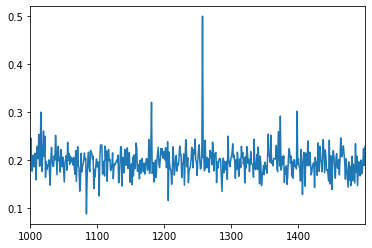

In [15]:
import matplotlib.pyplot as plt 
zero_call_index.plot()

На графике видно, что продолжительность 0 мин встречается у каждого пользователя ~ в 20% звонков. И есть более высокие и более низкие значения.  
Посмотрим, как вообще распределены звонки по длительности.

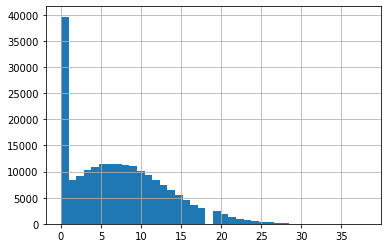

In [16]:
calls['duration'].hist(bins=40)

Заменим нулевые значения в столбце на 1.

In [17]:
calls['duration'] = calls['duration'].replace({0:1})

Создадим таблицы, в которых по каждому id будут отображаться помесячно количество и общая длительность звонков.

In [18]:
calls_pivot = calls.pivot_table(index=['user_id', 'month'], values='duration',  aggfunc=['count', 'sum'])
calls_pivot.columns = ['count_calls', 'duration']
calls_pivot.head(10)

count_calls  duration
user_id month                       
1000    5               22       164
        6               43       187
        7               47       346
        8               52       418
        9               58       478
        10              57       363
        11              43       344
        12              46       341
1001    11              59       444
        12              63       430

<font style="color:DeepPink; font-size:200%">•</font> Посмотрим на данные по использованию интернет трафика.

In [19]:
internet = pd.read_csv('/datasets/internet.csv')
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 6 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
month           149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.8+ MB


In [20]:
internet['mb_used'].describe()

count    149396.000000
mean        370.192426
std         278.300951
min           0.000000
25%         138.187500
50%         348.015000
75%         559.552500
max        1724.830000
Name: mb_used, dtype: float64

И снова нули. Много ли их?

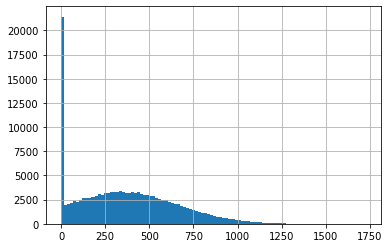

In [21]:
internet['mb_used'].hist(bins=100)

Пик на нуле.  
Посмотрим на строчки с нулевыми значениями.

In [22]:
internet.query('mb_used == 0 & user_id == 1000 & month == 6')

,Unnamed: 0,id,mb_used,session_date,user_id,month
46,46,1000_46,0.0,2018-06-30,1000,6
67,67,1000_67,0.0,2018-06-16,1000,6
72,72,1000_72,0.0,2018-06-15,1000,6
131,131,1000_131,0.0,2018-06-15,1000,6
193,193,1000_193,0.0,2018-06-17,1000,6


15 июня у пользователя с идентификатором 1000, например, две интернет сессии с нулевым трафиком.  
Сессии были, но до 1Мб. Заменим 0 значения на 1.  
И округлим потраченные мегабайты до целых чисел.

In [23]:
internet['mb_used'] = internet['mb_used'].replace({0:1})
def round_mb_used(data):
    duration = data['mb_used']
    ceil = math.ceil(duration)
    return ceil
 
internet['mb_used'] = internet.apply(round_mb_used, axis=1)

Создадим таблицу, в которой по каждому id будут отображаться помесячно использованные Мб.

In [24]:
internet_pivot = internet.pivot_table(index=['user_id', 'month'], values='mb_used',  aggfunc='sum')
internet_pivot.head()

mb_used
user_id month         
1000    5         2257
        6        23262
        7        14017
        8        14072
        9        14583

<font style="color:DeepPink; font-size:200%">•</font> Посмотрим на данные по сообщениям.

In [25]:
messages = pd.read_csv('/datasets/messages.csv')
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
month           123036 non-null int64
dtypes: int64(2), object(2)
memory usage: 3.8+ MB


In [26]:
messages.head()

,id,message_date,user_id,month
0,1000_0,2018-06-27,1000,6
1,1000_1,2018-10-08,1000,10
2,1000_2,2018-08-04,1000,8
3,1000_3,2018-06-16,1000,6
4,1000_4,2018-12-05,1000,12


Создадим таблицу, в которой по каждому id будут отображаться помесячно отправленные сообщения.

In [27]:
messages_pivot = messages.pivot_table(index=['user_id', 'month'], values='id',  aggfunc='count')
messages_pivot.columns = ['messages']
messages_pivot.head()

messages
user_id month          
1000    5            22
        6            60
        7            75
        8            81
        9            57

<font style="color:DeepPink; font-size:200%">•</font> Добавим последнюю таблицу с информацией по тарифам.

In [28]:
tariffs = pd.read_csv('/datasets/tariffs.csv')
tariffs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [29]:
tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


<font style="color:Lime; font-size:400%">•</font> Объединим все полученные таблицы в одну.

In [30]:
data = pd.merge(calls_pivot, internet_pivot, how='outer', left_on=['user_id', 'month'], right_index=True)
data = pd.merge(data, messages_pivot, how='outer', left_on=['user_id', 'month'], right_index=True)
data.head(10)

count_calls  duration  mb_used  messages
user_id month                                          
1000    5             22.0     164.0   2257.0      22.0
        6             43.0     187.0  23262.0      60.0
        7             47.0     346.0  14017.0      75.0
        8             52.0     418.0  14072.0      81.0
        9             58.0     478.0  14583.0      57.0
        10            57.0     363.0  14717.0      73.0
        11            43.0     344.0  14769.0      58.0
        12            46.0     341.0   9829.0      70.0
1001    11            59.0     444.0  18460.0       NaN
        12            63.0     430.0  14059.0       NaN

Проверим получившуюся таблицу на отсутствующие значения.

In [31]:
data.isna().sum()

count_calls     40
duration        40
mb_used         11
messages       497
dtype: int64

Есть пользователи, которые не звонят, не шлют смс, не пользуются интернетом.  
Заменим отсутсвующие значения на нули.

In [32]:
data = data.fillna(0)
data = data.reset_index(level='month')
data = data.reset_index(level='user_id')

In [33]:
data.isna().sum()

user_id        0
month          0
count_calls    0
duration       0
mb_used        0
messages       0
dtype: int64

<font style="color:Lime; font-size:200%">•</font> Добавим таблицу с информацией о пользователях к нашим сводным данным.

In [34]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff,reg_month,churn_month,months_exploit
0,1000,52,NaT,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,5,0.0,8.0
1,1001,41,NaT,Москва,Иван,Ежов,2018-11-01,smart,11,0.0,2.0
2,1002,59,NaT,Стерлитамак,Евгений,Абрамович,2018-06-17,smart,6,0.0,7.0
3,1003,23,NaT,Москва,Белла,Белякова,2018-08-17,ultra,8,0.0,5.0
4,1004,68,NaT,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra,5,0.0,8.0


In [35]:
data = pd.merge(left=data, right=users, how='left', left_on=['user_id'], right_on=['user_id'])
data.columns

Index(['user_id', 'month', 'count_calls', 'duration', 'mb_used', 'messages',
       'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date',
       'tariff', 'reg_month', 'churn_month', 'months_exploit'],
      dtype='object')

In [36]:
data[['user_id', 'month', 'count_calls', 'duration', 'mb_used', 'messages', 'tariff']].head()

,user_id,month,count_calls,duration,mb_used,messages,tariff
0,1000,5,22.0,164.0,2257.0,22.0,ultra
1,1000,6,43.0,187.0,23262.0,60.0,ultra
2,1000,7,47.0,346.0,14017.0,75.0,ultra
3,1000,8,52.0,418.0,14072.0,81.0,ultra
4,1000,9,58.0,478.0,14583.0,57.0,ultra


<font style="color:Lime; font-size:200%">•</font> Добавим таблицу с информацией о тарифах.

In [37]:
data = pd.merge(left=data, right=tariffs, how='left', left_on=['tariff'], right_on=['tariff_name'])
data.columns

Index(['user_id', 'month', 'count_calls', 'duration', 'mb_used', 'messages',
       'age', 'churn_date', 'city', 'first_name', 'last_name', 'reg_date',
       'tariff', 'reg_month', 'churn_month', 'months_exploit',
       'messages_included', 'mb_per_month_included', 'minutes_included',
       'rub_monthly_fee', 'rub_per_gb', 'rub_per_message', 'rub_per_minute',
       'tariff_name'],
      dtype='object')

In [39]:
data[['user_id', 'month', 'count_calls', 'duration', 'mb_used', 'messages', 'tariff', 'messages_included', \
      'mb_per_month_included', 'minutes_included']].head()

,user_id,month,count_calls,duration,mb_used,messages,tariff,messages_included,mb_per_month_included,minutes_included
0,1000,5,22.0,164.0,2257.0,22.0,ultra,1000,30720,3000
1,1000,6,43.0,187.0,23262.0,60.0,ultra,1000,30720,3000
2,1000,7,47.0,346.0,14017.0,75.0,ultra,1000,30720,3000
3,1000,8,52.0,418.0,14072.0,81.0,ultra,1000,30720,3000
4,1000,9,58.0,478.0,14583.0,57.0,ultra,1000,30720,3000


<font style="color:Lime; font-size:200%">•</font> Посчитаем потраченные сверх тарифа минуты, мегабайты и сообщения.

In [40]:
def duration_delta(data):
    if data['duration'] > data['minutes_included']:
        return data['duration'] - data['minutes_included']
    else:
        return 0

data['duration_delta'] = data.apply(duration_delta, axis=1)

In [42]:
def gb_used_delta(data):
    if data['mb_used'] > data['mb_per_month_included']:
        return math.ceil((data['mb_used'] - data['mb_per_month_included']) / 1024)
    else:
        return 0

data['gb_used_delta'] = data.apply(gb_used_delta, axis=1)

In [43]:
def messages_delta(data):
    if data['messages'] > data['messages_included']:
        return data['messages'] - data['messages_included']
    else:
        return 0

data['messages_delta'] = data.apply(messages_delta, axis=1)

In [44]:
data[['user_id', 'month', 'count_calls', 'duration', 'mb_used', 'messages', 'tariff', 'duration_delta', 'gb_used_delta', \
      'messages_delta']].head()

,user_id,month,count_calls,duration,mb_used,messages,tariff,duration_delta,gb_used_delta,messages_delta
0,1000,5,22.0,164.0,2257.0,22.0,ultra,0.0,0,0.0
1,1000,6,43.0,187.0,23262.0,60.0,ultra,0.0,0,0.0
2,1000,7,47.0,346.0,14017.0,75.0,ultra,0.0,0,0.0
3,1000,8,52.0,418.0,14072.0,81.0,ultra,0.0,0,0.0
4,1000,9,58.0,478.0,14583.0,57.0,ultra,0.0,0,0.0


<font style="color:Lime; font-size:200%">•</font> Рассчитаем суммы, потраченные сверх тарифов.

In [46]:
data['out_of_lim_duration_total'] = data['duration_delta'] * data['rub_per_minute']
data['out_of_lim_gb_total'] = data['gb_used_delta'] * data['rub_per_gb']
data['out_of_lim_messages_total'] = data['messages_delta'] * data['rub_per_message']

In [47]:
data['out_of_lim_total'] = data['out_of_lim_duration_total'] + data['out_of_lim_gb_total'] + data['out_of_lim_messages_total']
data['rub_total_total'] = data['out_of_lim_total'] + data['rub_monthly_fee']

In [48]:
data[['user_id', 'month', 'tariff', 'rub_monthly_fee', 'out_of_lim_total', 'rub_total_total']].sample(5)

,user_id,month,tariff,rub_monthly_fee,out_of_lim_total,rub_total_total
2441,1386,9,smart,550,3209.0,3759.0
2524,1396,11,ultra,1950,0.0,1950.0
1715,1275,6,smart,550,200.0,750.0
1717,1275,8,smart,550,0.0,550.0
889,1144,9,smart,550,887.0,1437.0


<font style="color:DarkViolet; font-size:400%">•</font> Подберем типовые характеристики пользователей тарифов.

In [49]:
smart_data = data.query('tariff == "smart"')
ultra_data = data.query('tariff == "ultra"')

In [50]:
describe_smart = smart_data[['count_calls', 'duration', 'mb_used', 'messages', 'out_of_lim_total', 'rub_total_total']].describe()
describe_ultra = ultra_data[['count_calls', 'duration', 'mb_used', 'messages', 'out_of_lim_total', 'rub_total_total']].describe()

In [51]:
describe = pd.merge(left=describe_smart, right=describe_ultra, how='outer', left_index=True, right_index=True, \
                    suffixes=('_smart','_ultra'))

<font style="color:DarkViolet; font-size:200%">•</font> Сколько минут разговора требуется пользователям в месяц?

In [52]:
describe.filter(like='duration')

,duration_smart,duration_ultra
count,2229.000000,985.000000
mean,429.450875,540.779695
std,194.871174,325.738740
min,0.000000,0.000000
25%,291.000000,292.000000
50%,435.000000,532.000000
75%,560.000000,773.000000
max,1471.000000,1727.000000


In [53]:
def mustaches(data, column):
    Q1 = data[column]['25%']
    Q3 = data[column]['75%']
    IQR = Q3 - Q1
    lower_mustache = Q1 - 1.5 * IQR
    upper_mustache = Q3 + 1.5 * IQR
    print('нижний ус: {}'.format(lower_mustache))
    print('верхний ус: {}'.format(upper_mustache)) 

In [54]:
print('smart: ')
mustaches(describe, 'duration_smart')
print('ultra: ')
mustaches(describe, 'duration_ultra')

smart: 
нижний ус: -112.5
верхний ус: 963.5
ultra: 
нижний ус: -429.5
верхний ус: 1494.5


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


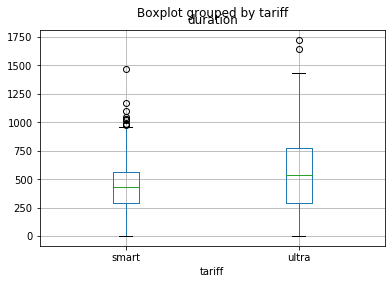

In [55]:
data.boxplot('duration', by = 'tariff')

Пользователи тарифа Smart тратят меньше времени на разговоры, чем пользователи тарифа Ultra.  
<font style="background-color:yellow">Верхняя граница характерного разброса значений для тарифа Smart - 963 мин, для тарифа Ultra - 1494 мин.</font>

<font style="color:gray"><i>* По тарифу включено: Smart 500 мин., Ultra 3000 мин.</i></font>

<font style="color:DarkViolet; font-size:200%">•</font> Сколько звонков требуется пользователям в месяц?

In [56]:
describe.filter(like='count_calls')

,count_calls_smart,count_calls_ultra
count,2229.000000,985.000000
mean,58.463437,73.392893
std,25.939858,43.916853
min,0.000000,0.000000
25%,40.000000,41.000000
50%,60.000000,74.000000
75%,76.000000,104.000000
max,198.000000,244.000000


In [57]:
print('smart: ')
mustaches(describe, 'count_calls_smart')
print('ultra: ')
mustaches(describe, 'count_calls_ultra')

smart: 
нижний ус: -14.0
верхний ус: 130.0
ultra: 
нижний ус: -53.5
верхний ус: 198.5


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


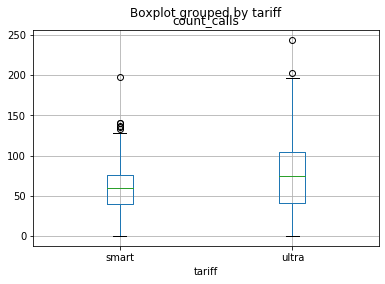

In [58]:
data.boxplot('count_calls', by = 'tariff')

Верхняя граница характерного разброса значений для тарифа Smart - 130 звонков, для тарифа Ultra - 198 звонков.

<font style="color:DarkViolet; font-size:200%">•</font> Сколько сообщений требуется пользователям в месяц?

In [59]:
describe.filter(like='messages')

,messages_smart,messages_ultra
count,2229.000000,985.000000
mean,33.384029,49.363452
std,28.227876,47.804457
min,0.000000,0.000000
25%,10.000000,6.000000
50%,28.000000,38.000000
75%,51.000000,79.000000
max,143.000000,224.000000


In [60]:
print('smart: ')
mustaches(describe, 'messages_smart')
print('ultra: ')
mustaches(describe, 'messages_ultra')

smart: 
нижний ус: -51.5
верхний ус: 112.5
ultra: 
нижний ус: -103.5
верхний ус: 188.5


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


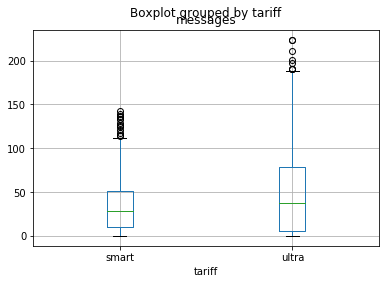

In [61]:
data.boxplot('messages', by = 'tariff')

<font style="background-color:yellow">Верхняя граница характерного разброса значений для тарифа Smart - 112 сообщений, для тарифа Ultra - 188 сообщений.</font>  

<font style="color:gray"><i>* По тарифу включено: Smart 50 сообщений, Ultra 1000 сообщений.</i></font>

<font style="color:DarkViolet; font-size:200%">•</font> Сколько Мб траффика требуется пользователям в месяц?

In [62]:
describe.filter(like='mb_used')

,mb_used_smart,mb_used_ultra
count,2229.000000,985.000000
mean,16237.184388,19488.703553
std,5879.795158,10097.107541
min,0.000000,0.000000
25%,12662.000000,11787.000000
50%,16540.000000,19324.000000
75%,20078.000000,26866.000000
max,38627.000000,49793.000000


In [63]:
print('smart: ')
mustaches(describe, 'mb_used_smart')
print('ultra: ')
mustaches(describe, 'mb_used_ultra')

smart: 
нижний ус: 1538.0
верхний ус: 31202.0
ultra: 
нижний ус: -10831.5
верхний ус: 49484.5


/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


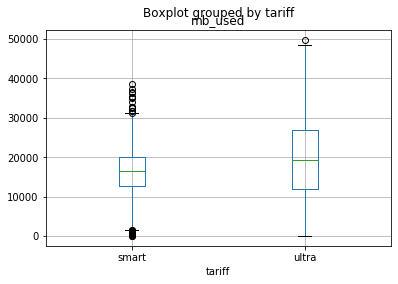

In [64]:
data.boxplot('mb_used', by = 'tariff')

Пользователи трафа Smart расходуют меньше трафика, чем пользователи тарифа Ultra.  
<font style="background-color:yellow">Характерный разброс значений для тарифа Smart: от 1538 Мб (1,5 Гб) до 31202 Мб (30,5 Гб).  
Для пользователей тарифа Ultra ограничим только верхний порог до 49484 Мб (48 Гб).</font>  

<font style="color:gray"><i>* По тарифу включено: Smart - 15 Гб, Ultra - 30 Гб.</i>

<font style="color:DeepSkyBlue; font-size:400%">•</font> Отфильтруем типовых пользователей тарифов.

In [65]:
filt_smart_data = smart_data.query('duration < 963.5 & messages < 112.5 & 1538.0 < mb_used < 31202.0').copy()
filt_ultra_data = ultra_data.query('duration < 1494.5 & messages < 188.5 & mb_used < 49484.5').copy()

In [66]:
filt_smart_data['gb_used'] = filt_smart_data['mb_used'] / 1024
filt_ultra_data['gb_used'] = filt_ultra_data['mb_used'] / 1024

In [67]:
describe_filt_smart = filt_smart_data[['count_calls', 'duration', 'gb_used', 'messages', 'out_of_lim_total', \
                                       'rub_total_total']].describe()
describe_filt_ultra = filt_ultra_data[['count_calls', 'duration', 'gb_used', 'messages', 'out_of_lim_total', \
                                       'rub_total_total']].describe()

In [68]:
describe_filt = pd.merge(left=describe_filt_smart, right=describe_filt_ultra, how='outer', left_index=True, right_index=True, \
                    suffixes=('_smart','_ultra'))

<font style="color:DeepSkyBlue; font-size:200%">•</font> Рассмотрим расход минут пользователей разных тарифов в типовой выборке.

In [69]:
print('Среднее количество использованных минут в месяц:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['duration_smart']['mean'], describe_filt['duration_ultra']['mean']))
print('Дисперсия:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['duration_smart']['std']**2, \
                                            describe_filt['duration_ultra']['std']**2))
print('Стандартное отклонение:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['duration_smart']['std'], describe_filt['duration_ultra']['std']))


Среднее количество использованных минут в месяц:
smart: 429, ultra: 539
Дисперсия:
smart: 34737, ultra: 102727
Стандартное отклонение:
smart: 186, ultra: 321


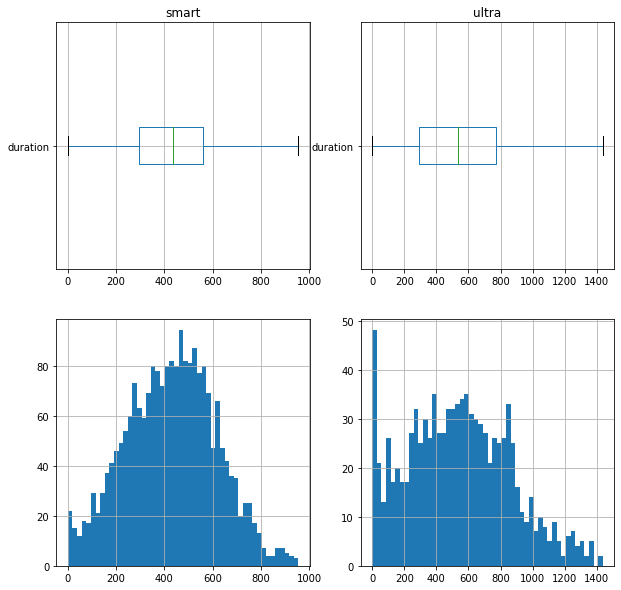

In [70]:
plt.subplots(figsize = (10, 10))
plot = (filt_smart_data['duration']
        .hist(bins=50, ax = plt.subplot(2, 2, 3))
       )
plot = (filt_smart_data[['duration']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 1))
        .set_title('smart')
       )
plot = (filt_ultra_data['duration']
        .hist(bins=50, ax = plt.subplot(2, 2, 4))
       )
plot = (filt_ultra_data[['duration']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 2))
        .set_title('ultra')
       )


Медиана минут разговора в тарифе ультра больше и весь датасет сильнее скошен вправо.

<font style="color:DeepSkyBlue; font-size:200%">•</font> Рассмотрим использование сообщений пользователями в типовой выборке.

In [71]:
print('Среднее количество отправленных сообщений в месяц:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['messages_smart']['mean'], describe_filt['messages_ultra']['mean']))
print('Дисперсия:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['messages_smart']['std']**2, \
                                            describe_filt['messages_ultra']['std']**2))
print('Стандартное отклонение:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['messages_smart']['std'], describe_filt['messages_ultra']['std']))


Среднее количество отправленных сообщений в месяц:
smart: 33, ultra: 48
Дисперсия:
smart: 741, ultra: 2106
Стандартное отклонение:
smart: 27, ultra: 46


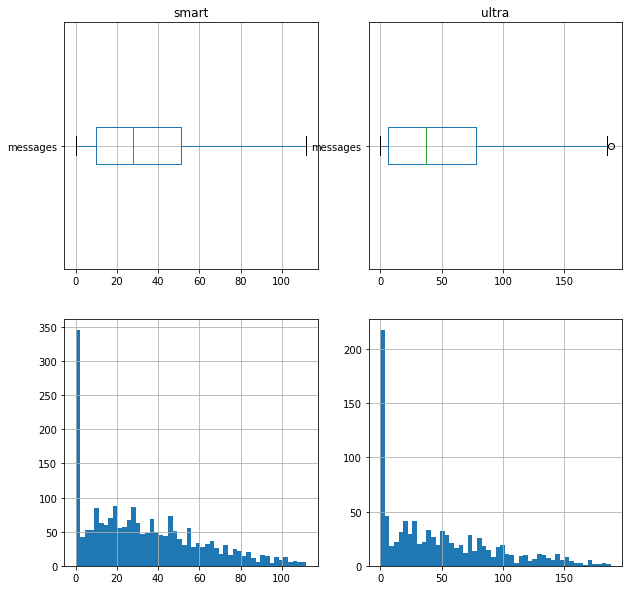

In [72]:
plt.subplots(figsize = (10, 10))
plot = (filt_smart_data['messages']
        .hist(bins=50, ax = plt.subplot(2, 2, 3))
       )
plot = (filt_smart_data[['messages']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 1))
        .set_title('smart')
       )
plot = (filt_ultra_data['messages']
        .hist(bins=50, ax = plt.subplot(2, 2, 4))
       )
plot = (filt_ultra_data[['messages']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 2))
        .set_title('ultra')
       )


Медиана сообщений в ultra больше. Оба датасета скошены вправо. И в обоих пик на 0.

<font style="color:DeepSkyBlue; font-size:200%">•</font> Рассмотрим использование трафика пользователями в типовой выборке.

In [73]:
print('Среднее количество израсходованных Гб в месяц:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['gb_used_smart']['mean'], describe_filt['gb_used_ultra']['mean']))
print('Дисперсия:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['gb_used_smart']['std']**2, \
                                            describe_filt['gb_used_ultra']['std']**2))
print('Стандартное отклонение:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['gb_used_smart']['std'], describe_filt['gb_used_ultra']['std']))


Среднее количество израсходованных Гб в месяц:
smart: 16, ultra: 19
Дисперсия:
smart: 29, ultra: 96
Стандартное отклонение:
smart: 5, ultra: 10


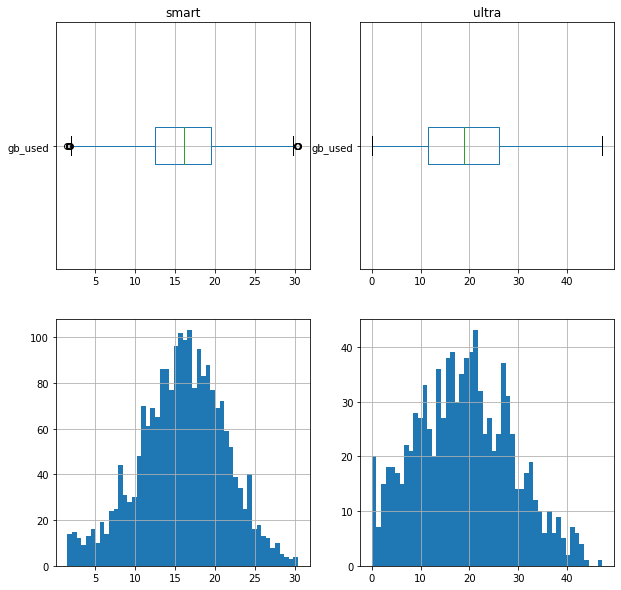

In [74]:
plt.subplots(figsize = (10, 10))
plot = (filt_smart_data['gb_used']
        .hist(bins=50, ax = plt.subplot(2, 2, 3))
       )
plot = (filt_smart_data[['gb_used']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 1))
        .set_title('smart')
       )
plot = (filt_ultra_data['gb_used']
        .hist(bins=50, ax = plt.subplot(2, 2, 4))
       )
plot = (filt_ultra_data[['gb_used']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 2))
        .set_title('ultra')
       )


В тарифе smart нормальное распределение, а в ultra датасет скошен вправо.

<font style="color:DeepSkyBlue; font-size:200%">•</font> Рассмотрим как тратят деньги сверх лимита пользователи тарифов.

In [75]:
print('Среднее количество потраченных сверх тарифа руб. в месяц:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['out_of_lim_total_smart']['mean'], \
                                            describe_filt['out_of_lim_total_ultra']['mean']))
print('Дисперсия:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['out_of_lim_total_smart']['std']**2, \
                                            describe_filt['out_of_lim_total_ultra']['std']**2))
print('Стандартное отклонение:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['out_of_lim_total_smart']['std'], \
                                            describe_filt['out_of_lim_total_ultra']['std']))


Среднее количество потраченных сверх тарифа руб. в месяц:
smart: 734, ultra: 116
Дисперсия:
smart: 581688, ultra: 133182
Стандартное отклонение:
smart: 763, ultra: 365


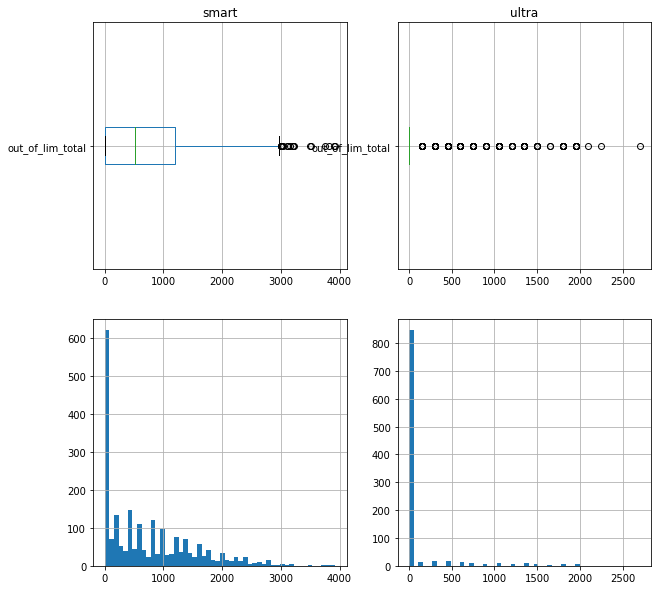

In [76]:
plt.subplots(figsize = (10, 10))
plot = (filt_smart_data['out_of_lim_total']
        .hist(bins=50, ax = plt.subplot(2, 2, 3))
       )
plot = (filt_smart_data[['out_of_lim_total']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 1))
        .set_title('smart')
       )
plot = (filt_ultra_data['out_of_lim_total']
        .hist(bins=50, ax = plt.subplot(2, 2, 4))
       )
plot = (filt_ultra_data[['out_of_lim_total']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 2))
        .set_title('ultra')
       )


Судя по гистограмме пользователи тарифа Smart чаще и больше платят сверх тарифа.  
Для пользователей тарифа Ultra плата сверх тарифа не попадет в характерный разброс значений :) 

Посмотрим, сколько же пользователиплатят сверх тарифа, когда платят.

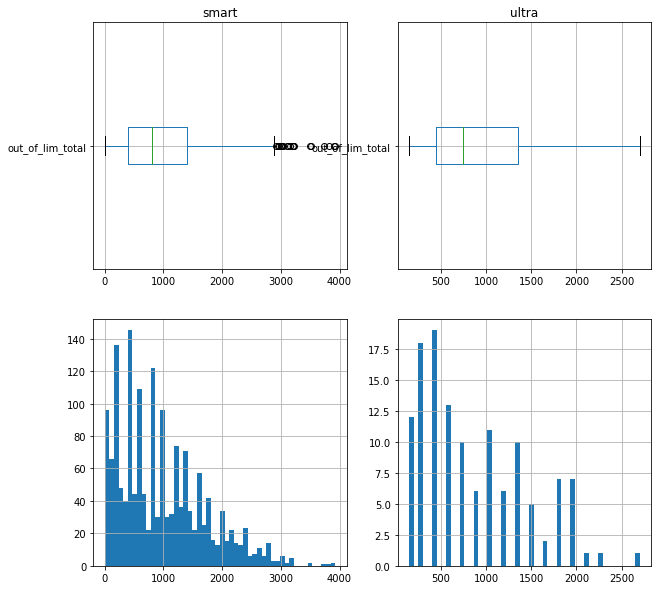

In [77]:
plt.subplots(figsize = (10, 10))
plot = (filt_smart_data.query('out_of_lim_total > 0')['out_of_lim_total']
        .hist(bins=50, ax = plt.subplot(2, 2, 3))
       )
plot = (filt_smart_data.query('out_of_lim_total > 0')[['out_of_lim_total']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 1))
        .set_title('smart')
       )
plot = (filt_ultra_data.query('out_of_lim_total > 0')['out_of_lim_total']
        .hist(bins=50, ax = plt.subplot(2, 2, 4))
       )
plot = (filt_ultra_data.query('out_of_lim_total > 0')[['out_of_lim_total']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 2))
        .set_title('ultra')
       )


In [78]:
print('Типичная плата сверх тарифа пользователей smart: от {} до {} руб.'.\
      format(filt_smart_data.query('out_of_lim_total > 0')['out_of_lim_total'].quantile(.25), \
                filt_smart_data.query('out_of_lim_total > 0')['out_of_lim_total'].quantile(.75)))
print('Типичная плата сверх тарифа пользователей ultra: от {} до {} руб.'.\
      format(filt_ultra_data.query('out_of_lim_total > 0')['out_of_lim_total'].quantile(.25), \
                filt_ultra_data.query('out_of_lim_total > 0')['out_of_lim_total'].quantile(.75)))

Типичная плата сверх тарифа пользователей smart: от 400.0 до 1400.0 руб.
Типичная плата сверх тарифа пользователей ultra: от 450.0 до 1350.0 руб.


In [79]:
prob_smart_out_of_lim = len(filt_smart_data.query('out_of_lim_total > 0')) / len(filt_smart_data)
prob_ultra_out_of_lim = len(filt_ultra_data.query('out_of_lim_total > 0')) / len(filt_ultra_data)
print('Вероятность того, что  пользователь тарифа smart заплатит сверх тарифа: {:.2%}, а пользователь тарифа ultra: \
{:.2%}'.format(prob_smart_out_of_lim, prob_ultra_out_of_lim))

Вероятность того, что  пользователь тарифа smart заплатит сверх тарифа: 75.58%, а пользователь тарифа ultra: 13.24%


<font style="color:DeepSkyBlue; font-size:200%">•</font> Рассмотрим общую выручку по тарифам.

In [80]:
print('Общая выручка по тарифам руб. в месяц:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['rub_total_total_smart']['mean'], \
                                            describe_filt['rub_total_total_ultra']['mean']))
print('Дисперсия:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['rub_total_total_smart']['std']**2, \
                                            describe_filt['rub_total_total_ultra']['std']**2))
print('Стандартное отклонение:')
print('smart: {:.0f}, ultra: {:.0f}'.format(describe_filt['rub_total_total_smart']['std'], \
                                            describe_filt['rub_total_total_ultra']['std']))


Общая выручка по тарифам руб. в месяц:
smart: 1284, ultra: 2066
Дисперсия:
smart: 581688, ultra: 133182
Стандартное отклонение:
smart: 763, ultra: 365


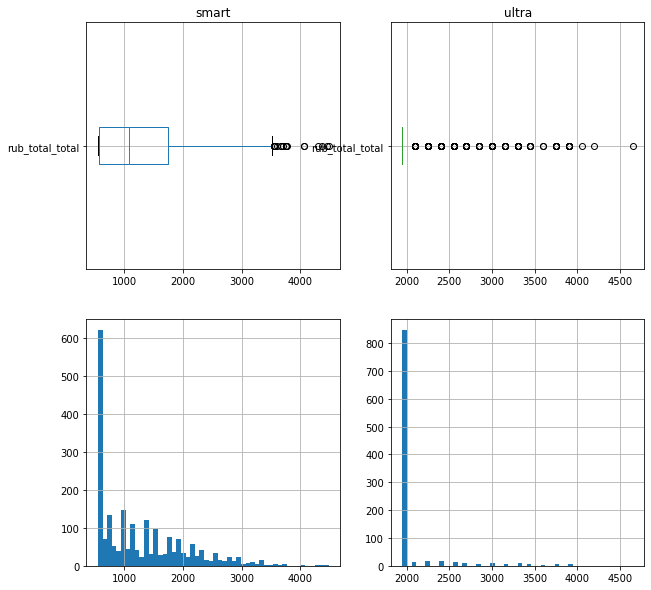

In [81]:
plt.subplots(figsize = (10, 10))
plot = (filt_smart_data['rub_total_total']
        .hist(bins=50, ax = plt.subplot(2, 2, 3))
       )
plot = (filt_smart_data[['rub_total_total']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 1))
        .set_title('smart')
       )
plot = (filt_ultra_data['rub_total_total']
        .hist(bins=50, ax = plt.subplot(2, 2, 4))
       )
plot = (filt_ultra_data[['rub_total_total']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 2))
        .set_title('ultra')
       )


Судя по гистограмме пользователи тарифа Smart чаще и больше платят сверх тарифа.  
Для пользователей тарифа Ultra плата сверх тарифа не попадет в характерный разброс значений :) 

<font style="color:DeepSkyBlue; font-size:200%">•</font> Рассмотрим среднюю выручку по Москве и регионам.

Создадим выборки по регионам.

In [82]:
filtered_data = data.query('(tariff == "smart" & duration < 963.5 & messages < 112.5 & 1538.0 < mb_used < 31202.0) | \
(tariff == "ultra" & duration < 1494.5 & messages < 188.5 & mb_used < 49484.5)')

In [83]:
moscow_data = filtered_data.query('city == "Москва"')
region_data = filtered_data.query('city != "Москва"')

In [84]:
describe_moscow_data = moscow_data[['out_of_lim_total', 'rub_total_total']].describe()
describe_region_data = region_data[['out_of_lim_total', 'rub_total_total']].describe()

In [85]:
print('Средняя выручка по тарифам руб. в месяц:')
print('Москва: {:.0f}, регионы: {:.0f}'.format(describe_moscow_data['rub_total_total']['mean'], \
                                            describe_region_data['rub_total_total']['mean']))
print('Дисперсия:')
print('Москва: {:.0f}, регионы: {:.0f}'.format(describe_moscow_data['rub_total_total']['std']**2, \
                                            describe_region_data['rub_total_total']['std']**2))
print('Стандартное отклонение:')
print('Москва: {:.0f}, регионы: {:.0f}'.format(describe_moscow_data['rub_total_total']['std'], \
                                            describe_region_data['rub_total_total']['std']))


Средняя выручка по тарифам руб. в месяц:
Москва: 1551, регионы: 1520
Дисперсия:
Москва: 529203, регионы: 583923
Стандартное отклонение:
Москва: 727, регионы: 764


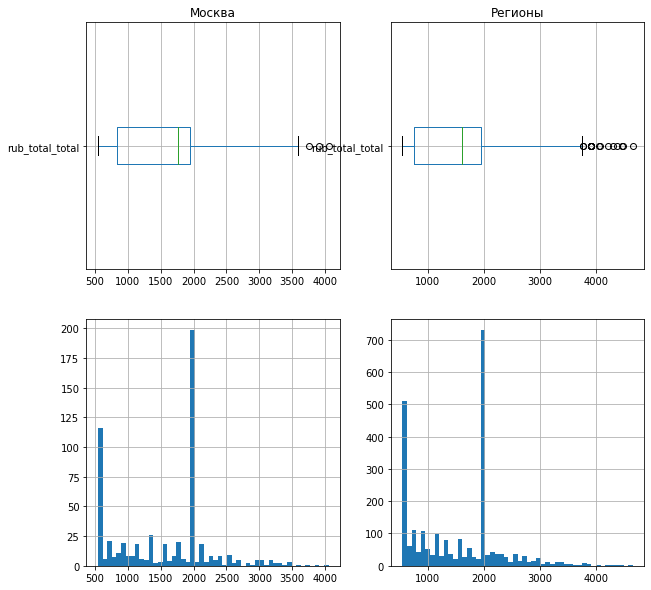

In [86]:
plt.subplots(figsize = (10, 10))
plot = (moscow_data['rub_total_total']
        .hist(bins=50, ax = plt.subplot(2, 2, 3))
       )
plot = (moscow_data[['rub_total_total']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 1))
        .set_title('Москва')
       )
plot = (region_data['rub_total_total']
        .hist(bins=50, ax = plt.subplot(2, 2, 4))
       )
plot = (region_data[['rub_total_total']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 2))
        .set_title('Регионы')
       )


Выборки между собой похожи.  
В обеих есть пики на 550 и 1950.  
Посмотрим, как распределны эти значения по регионам между тарифами.

<font style="color:DeepSkyBlue; font-size:200%">•</font> Рассмотрим общую выручку по тарифам по регионам.

In [87]:
filt_smart_data_moscow = filt_smart_data.query('city == "Москва"')
filt_smart_data_reg = filt_smart_data.query('city != "Москва"')
filt_ultra_data_moscow = filt_ultra_data.query('city == "Москва"')
filt_ultra_data_reg = filt_ultra_data.query('city != "Москва"')

In [88]:
describe_filt_smart_data_moscow = filt_smart_data_moscow[['out_of_lim_total', 'rub_total_total']].describe()
describe_filt_smart_data_reg = filt_smart_data_reg[['out_of_lim_total', 'rub_total_total']].describe()
describe_filt_ultra_data_moscow = filt_ultra_data_moscow[['out_of_lim_total', 'rub_total_total']].describe()
describe_filt_ultra_data_reg = filt_ultra_data_reg[['out_of_lim_total', 'rub_total_total']].describe()

In [89]:
print('Общая выручка по тарифу smart, руб.:')
print('в Москве: {:.0f}, в регионах: {:.0f}'.format(describe_filt_smart_data_moscow['rub_total_total']['mean'], \
                                            describe_filt_smart_data_reg['rub_total_total']['mean']))
print('Дисперсия:')
print('в Москве: {:.0f}, в регионах: {:.0f}'.format(describe_filt_smart_data_moscow['rub_total_total']['std']**2, \
                                            describe_filt_smart_data_reg['rub_total_total']['std']**2))
print('Стандартное отклонение:')
print('в Москве: {:.0f}, в регионах: {:.0f}'.format(describe_filt_smart_data_moscow['rub_total_total']['std'], \
                                            describe_filt_smart_data_reg['rub_total_total']['std']))
print()
print('Общая выручка по тарифу ultra, руб.:')
print('в Москве: {:.0f}, в регионах: {:.0f}'.format(describe_filt_ultra_data_moscow['rub_total_total']['mean'], \
                                            describe_filt_ultra_data_reg['rub_total_total']['mean']))
print('Дисперсия:')
print('в Москве: {:.0f}, в регионах: {:.0f}'.format(describe_filt_ultra_data_moscow['rub_total_total']['std']**2, \
                                            describe_filt_ultra_data_reg['rub_total_total']['std']**2))
print('Стандартное отклонение:')
print('в Москве: {:.0f}, в регионах: {:.0f}'.format(describe_filt_ultra_data_moscow['rub_total_total']['std'], \
                                            describe_filt_ultra_data_reg['rub_total_total']['std']))

Общая выручка по тарифу smart, руб.:
в Москве: 1247, в регионах: 1292
Дисперсия:
в Москве: 518689, в регионах: 595086
Стандартное отклонение:
в Москве: 720, в регионах: 771

Общая выручка по тарифу ultra, руб.:
в Москве: 2071, в регионах: 2064
Дисперсия:
в Москве: 120002, в регионах: 137276
Стандартное отклонение:
в Москве: 346, в регионах: 371


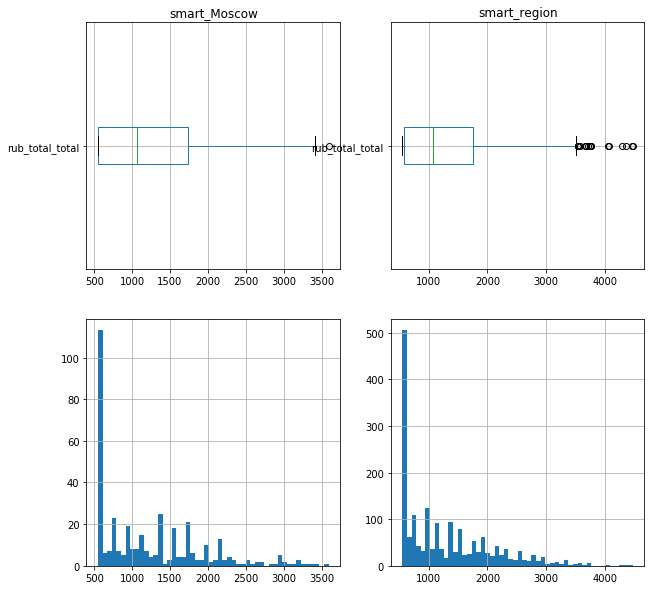

In [90]:
plt.subplots(figsize = (10, 10))
plot = (filt_smart_data_moscow['rub_total_total']
        .hist(bins=50, ax = plt.subplot(2, 2, 3))
       )
plot = (filt_smart_data_moscow[['rub_total_total']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 1))
        .set_title('smart_Moscow')
       )
plot = (filt_smart_data_reg['rub_total_total']
        .hist(bins=50, ax = plt.subplot(2, 2, 4))
       )
plot = (filt_smart_data_reg[['rub_total_total']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 2))
        .set_title('smart_region')
       )


Средняя выручка по тарифу smart в Москве и в регионах практически не отличается.

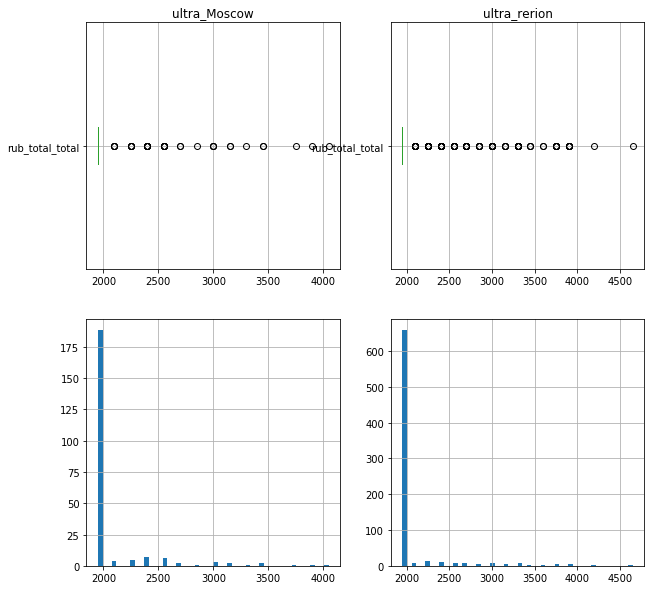

In [91]:
plt.subplots(figsize = (10, 10))
plot = (filt_ultra_data_moscow['rub_total_total']
        .hist(bins=50, ax = plt.subplot(2, 2, 3))
       )
plot = (filt_ultra_data_moscow[['rub_total_total']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 1))
        .set_title('ultra_Moscow')
       )
plot = (filt_ultra_data_reg['rub_total_total']
        .hist(bins=50, ax = plt.subplot(2, 2, 4))
       )
plot = (filt_ultra_data_reg[['rub_total_total']]
        .boxplot(vert=False, ax = plt.subplot(2, 2, 2))
        .set_title('ultra_rerion')
       )


Средняя выручка по тарифу ultra в Москве и в регионах практически не отличается.

<font style="color:MediumOrchid; font-size:400%">•</font> Проверим гипотезы

<font style="color:MediumOrchid; font-size:200%">•</font> Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются?

Формулируем нулевую гипотезу: Средняя выручка тарифов "Ультра" и "Смарт" равны.  
Альтернативная гипотеза: Средняя выручка тарифов различается.

In [92]:
from scipy import stats as st
import numpy as np
revenue_smart = filt_smart_data['out_of_lim_total']
revenue_ultra = filt_ultra_data['out_of_lim_total']
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    revenue_smart, 
    revenue_ultra,
    equal_var = False)
 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 1.745578787239611e-181
Отвергаем нулевую гипотезу


Средняя выручка тарифов различается.

<font style="color:MediumOrchid; font-size:200%">•</font> Общая выручка пользователей тарифов «Ультра» и «Смарт» различаются?

Формулируем нулевую гипотезу: Общая выручка тарифов "Ультра" и "Смарт" равны.  
Альтернативная гипотеза: Общая выручка тарифов различается.

In [93]:
tariffs.to_csv('name.csv')

In [94]:
revenue_smart = filt_smart_data['rub_total_total']
revenue_ultra = filt_ultra_data['rub_total_total']
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    revenue_smart, 
    revenue_ultra,
    equal_var = False)
 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 7.711390463476449e-270
Отвергаем нулевую гипотезу


Общая выручка тарифов различается.

<font style="color:MediumOrchid; font-size:200%">•</font> Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов?

Формулируем нулевую гипотезу: Средняя выручка пользователей из Москвы равна выручке пользователей из других регионов.  
Альтернативная гипотеза: Средняя выручка пользователей Москвы отличается от выручки пользователей из других регионов.

In [95]:
revenue_smart = moscow_data['out_of_lim_total']
revenue_ultra = region_data['out_of_lim_total']
alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    revenue_smart, 
    revenue_ultra)

 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.02631088201298103
Отвергаем нулевую гипотезу


Средняя выручка пользователей Москвы отличается от выручки пользователей из других регионов.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when cre

483.85643564356434 556.5839243498818 99 397


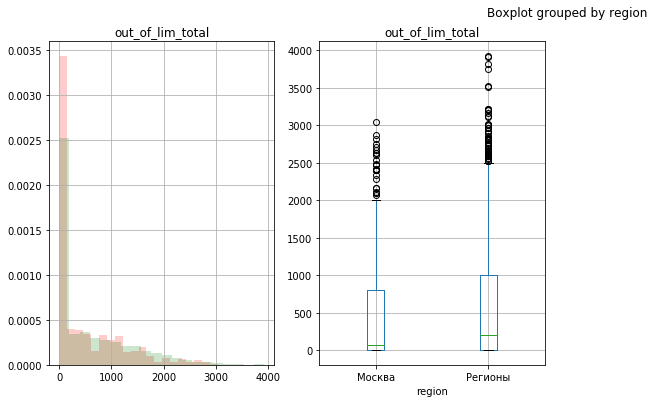

In [96]:
report = moscow_data.copy()
report['region'] = 'Москва'
report_region = region_data.copy()
report_region['region'] = 'Регионы'
report = report.append(report_region)

plt.subplots(figsize = (18, 6))
#
report.query('region == "Москва"').hist('out_of_lim_total', ax = plt.subplot(1,4,1), 
                                        alpha = 0.2, color = 'red', bins = 20, normed = True)
report.query('region != "Москва"').hist('out_of_lim_total', ax = plt.subplot(1,4,1), 
                                        alpha = 0.2, color = 'green', bins  = 20, normed = True)
report.boxplot('out_of_lim_total', by = 'region',  ax = plt.subplot(1,4,2))
print(report.query('region == "Москва"')['out_of_lim_total'].mean(), 
      report.query('region != "Москва"')['out_of_lim_total'].mean(),
      len(report.query('region == "Москва"')['user_id'].unique()),
      len(report.query('region != "Москва"')['user_id'].unique()))

Визуально данные  правктически не отличаются, но боксплот показывает, что у регионов больше выбросов вверх, чем у Москвы. Возможно, это создает более "длинный хвост". Почистим выбросы и еще раз сравним распределения.

/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/hist.py:412: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  ax.hist(data[col].dropna().values, bins=bins, **kwds)
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]
/opt/conda/lib/python3.7/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating 

390.46712802768167 505.2294685990338 99 397
p-значение: 8.468710801831522e-05
Отвергаем нулевую гипотезу


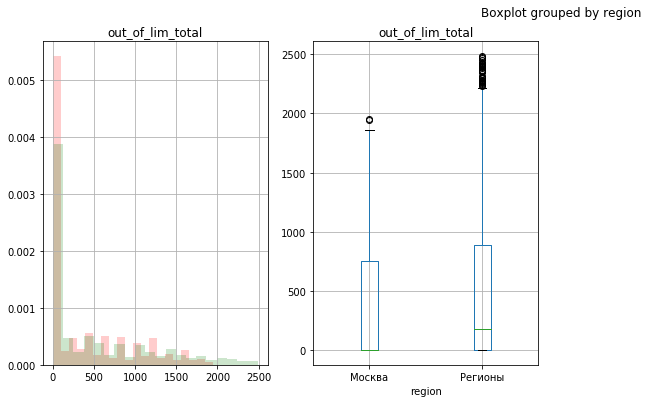

In [97]:
report = moscow_data.copy()
report['region'] = 'Москва'
report_region = region_data.copy()
report_region['region'] = 'Регионы'
report = report.append(report_region)
#убираем выбросы 
report = report.query('(region == "Москва" and out_of_lim_total < 2000) or (region != "Москва" and out_of_lim_total < 2500)')

plt.subplots(figsize = (18, 6))
#
report.query('region == "Москва"').hist('out_of_lim_total', ax = plt.subplot(1,4,1), 
                                        alpha = 0.2, color = 'red', bins = 20, normed = True)
report.query('region != "Москва"').hist('out_of_lim_total', ax = plt.subplot(1,4,1), 
                                        alpha = 0.2, color = 'green', bins  = 20, normed = True)
report.boxplot('out_of_lim_total', by = 'region',  ax = plt.subplot(1,4,2))
print(report.query('region == "Москва"')['out_of_lim_total'].mean(), 
      report.query('region != "Москва"')['out_of_lim_total'].mean(),
      len(report.query('region == "Москва"')['user_id'].unique()),
      len(report.query('region != "Москва"')['user_id'].unique()))

alpha = .05 # критический уровень статистической значимости

results = st.ttest_ind(
    report.query('region == "Москва"')['out_of_lim_total'], 
    report.query('region != "Москва"')['out_of_lim_total'])

 
print('p-значение:', results.pvalue)
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Нет, равенства средних не наблюдается. Плюс "длинный хвост" у регионов стал более явным. Видимо, по какой-то причине пользователи в регионах действительно переплачивают в среднем больше, чем в Москве. 

Еще одна гипотеза в том, что у нас недостаточно много даннных - по Москве данные всего 99 пользователей, а по регионам в 4 раза больше.